# Case Study 2

In [1]:
#Case Study #2
#There is 1 dataset(csv) with 3 years worth of customer orders. There are 4 columns in the csv dataset: index, CUSTOMER_EMAIL(unique identifier as hash), Net_Revenue, and Year.
#For each year we need the following information:

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#read data
data = pd.read_csv('casestudy.csv')
data = data.drop('Unnamed: 0',axis = 1)
data.head(5)

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


In [4]:
#For each year we need the following information:
#•	Total revenue for the current year
print('Total revenue for 2015 is',round(data[data['year'] == 2015]['net_revenue'].sum(),2))
print('Total revenue for 2016 is',round(data[data['year'] == 2016]['net_revenue'].sum(),2))
print('Total revenue for 2017 is',round(data[data['year'] == 2017]['net_revenue'].sum(),2))

Total revenue for 2015 is 29036749.19
Total revenue for 2016 is 25730943.59
Total revenue for 2017 is 31417495.03


In [5]:
#•	New Customer Revenue e.g. new customers not present in previous year only
data_1 = data.set_index('customer_email')
s1 = data_1[data_1['year'] == 2015]
s2 = data_1[data_1['year'] == 2016]
s3 = data_1[data_1['year'] == 2017]
new_customer_2016 = s2.loc[s2.index.difference(s1.index)]['net_revenue'].sum()
new_customer_2017 = s3.loc[s3.index.difference(s2.index)]['net_revenue'].sum()

print('New Customer Revenue in 2016 is',round(new_customer_2016,2))
print('New Customer Revenue in 2017 is',round(new_customer_2017,2))

New Customer Revenue in 2016 is 18245491.01
New Customer Revenue in 2017 is 28776235.04


In [6]:
#•	Existing Customer Growth. 
#To calculate this,
#use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year
exist_cus_growth_2016 = (s2.loc[s2.index.intersection(s1.index)]['net_revenue'].sum()-s1['net_revenue'].sum())/s1['net_revenue'].sum()
exist_cus_growth_2017 = (s3.loc[s3.index.intersection(s2.index)]['net_revenue'].sum()-s2['net_revenue'].sum())/s2['net_revenue'].sum()

print('Existing Customer Revenue growth in 2016 is',round(exist_cus_growth_2016,2)*100,'%')
print('Existing Customer Revenue growth in 2017 is',round(exist_cus_growth_2017,2)*100,'%')

Existing Customer Revenue growth in 2016 is -74.0 %
Existing Customer Revenue growth in 2017 is -90.0 %


In [7]:
#•	Revenue lost from attrition
lost_customer_2016 = s1.loc[s1.index.difference(s2.index)]['net_revenue'].sum()
lost_customer_2017 = s2.loc[s2.index.difference(s3.index)]['net_revenue'].sum()

print('Revenue lost from attrition in 2016 is',round(-lost_customer_2016,2))
print('Revenue lost from attrition in 2017 is',round(-lost_customer_2017,2))

Revenue lost from attrition in 2016 is -21571632.07
Revenue lost from attrition in 2017 is -23110294.94


In [8]:
#•	Existing Customer Revenue Current Year
exist_cus_2016 = s2.loc[s2.index.intersection(s1.index)]['net_revenue'].sum()
exist_cus_2017 = s3.loc[s3.index.intersection(s2.index)]['net_revenue'].sum()

print('Existing Customer Revenue in 2016 is',round(exist_cus_2016,2))
print('Existing Customer Revenue in 2017 is',round(exist_cus_2017,2))

Existing Customer Revenue in 2016 is 7485452.58
Existing Customer Revenue in 2017 is 2641259.99


In [9]:
#•	Existing Customer Revenue Prior Year
exist_cus_pri_2015 = s1.loc[s1.index.intersection(s2.index)]['net_revenue'].sum()
exist_cus_pri_2016 = s2.loc[s2.index.intersection(s3.index)]['net_revenue'].sum()

print('Existing Customer Revenue in 2015 is',round(exist_cus_pri_2015,2))
print('Existing Customer Revenue in 2016 is',round(exist_cus_pri_2016,2))

Existing Customer Revenue in 2015 is 7465117.12
Existing Customer Revenue in 2016 is 2620648.65


In [10]:
#•	Total Customers Current Year
total_customer_2015 = data[data['year'] == 2015].count()[0]
total_customer_2016 = data[data['year'] == 2016].count()[0]
total_customer_2017 = data[data['year'] == 2017].count()[0]

print('Total Customers in 2015 is',total_customer_2015)
print('Total Customers in 2016 is',total_customer_2016)
print('Total Customers in 2017 is',total_customer_2017)

Total Customers in 2015 is 231294
Total Customers in 2016 is 204646
Total Customers in 2017 is 249987


In [11]:
#Total Customers Previous Year
total_customer_2016 = data[data['year'] == 2016].count()[0]
total_customer_2017 = data[data['year'] == 2017].count()[0]

print('In 2016, total Customers of previous year(2015) is',total_customer_2015)
print('In 2017, total Customers of previsou year(2016) is',total_customer_2016)


In 2016, total Customers of previous year(2015) is 231294
In 2017, total Customers of previsou year(2016) is 204646


In [12]:
#•	New Customers
new_customer_num_2016 = s2.loc[s2.index.difference(s1.index)].count()[0]
new_customer_num_2017 = s3.loc[s3.index.difference(s2.index)].count()[0]

print('In 2016, total new Customers is',new_customer_num_2016)
print('In 2017, total new Customers is',new_customer_num_2017)

In 2016, total new Customers is 145062
In 2017, total new Customers is 229028


In [13]:
#•	Lost Customers
lost_customer_num_2016 = s1.loc[s1.index.difference(s2.index)].count()[0]
lost_customer_num_2017 = s2.loc[s2.index.difference(s3.index)].count()[0]

print('In 2016, the number of lost Customers is',lost_customer_num_2016)
print('In 2017, the number of lost Customers is',lost_customer_num_2017)

In 2016, the number of lost Customers is 171710
In 2017, the number of lost Customers is 183687


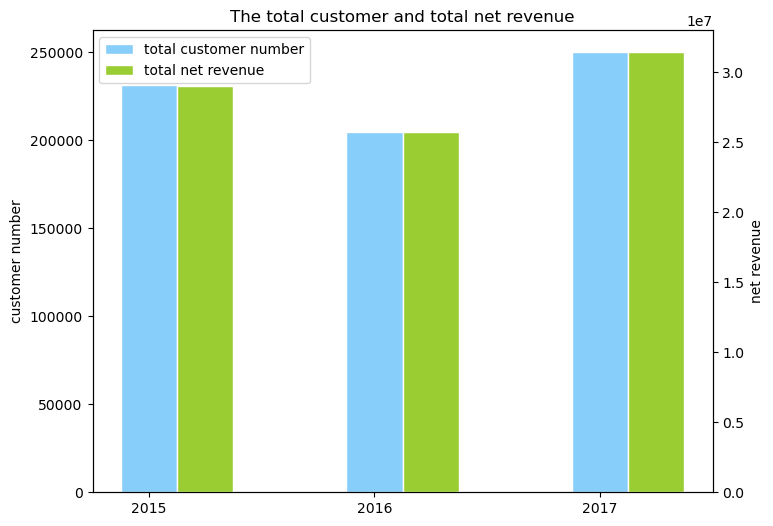

In [27]:
#Additionally, generate a few unique plots highlighting some information from the dataset. Are there any interesting observations?
#The total amount of customer number and total net revenue in each year
name = ["2015","2016","2017"]
y1 = np.round(data.groupby('year').count()['customer_email'].values,2)
y2 = np.round(data.groupby('year').sum()['net_revenue'].values,2)

x = np.arange(len(name))
width = 0.25

fig,ax1 = plt.subplots(figsize = (8,6))
ax2 = ax1.twinx()
l1 = ax1.bar(x, y1,  width=width, label='total customer number', facecolor = 'lightskyblue', edgecolor = 'white',tick_label=name)
l2 = ax2.bar(x + width, y2, width=width, label='total net revenue',facecolor = 'yellowgreen', edgecolor = 'white')


plt.legend([l1,l2],['total customer number','total net revenue']) 
ax1.set_ylabel('customer number')
ax2.set_ylabel('net revenue')
plt.title('The total customer and total net revenue')
plt.show()

From the plot above, we can see that the total customer number and total net revenue decreased in 2016 and increased in 2017. Plus, the total customer number and total net revenue has positive correlation.

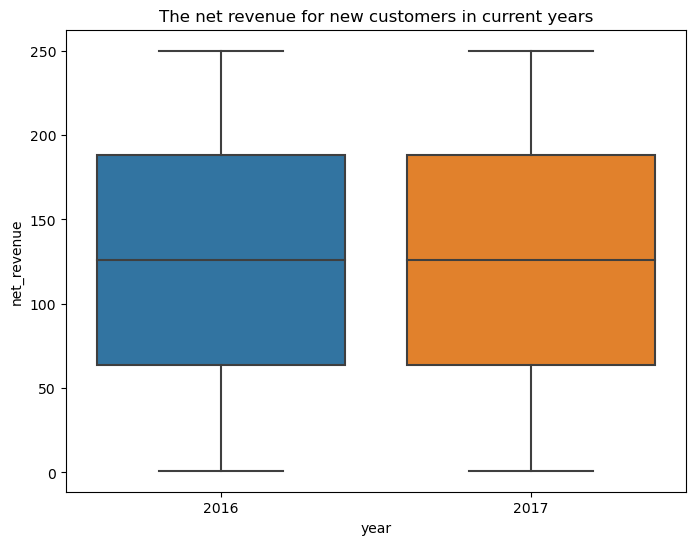

In [28]:
#New Customers
new_customer_data =  pd.merge(s2.loc[s2.index.difference(s1.index)],s3.loc[s3.index.difference(s2.index)],how = 'outer')
fig = plt.figure(figsize = (8,6))
sns.boxplot(x='year', y='net_revenue', data = new_customer_data)
plt.title('The net revenue for new customers in current years')
plt.show()

From the plot above, we can see that the mean of net revenue for new customers in 2016 and 2017 has slight difference, whereas the total net revenue in 2017 is more than toal net revenue in 2016, indicating that the amount of new customer is the determinent that increased the total revenue.